# 🟢 TP1 | Dados para Machine Learning: Feature Engineering

Para o TP1 da disciplina de **Dados para Machine Learning: Feature Engineering**, você deverá realizar os 12 exercícios da lista abaixo. Esta lista de exercícios visa avaliar a primeira competência prevista para esta disciplina: **Manipular dados numéricos para algoritmos de Machine Learning**. *Você deve acessar o dataset disponibilizado abaixo, respondendo as perguntas com suas próprias palavras e efetuando os comandos solicitados por conta própria.*

Neste trabalho, utilizaremos o dataset dos *Palmerpenguins*.

## ⤵️ Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, FunctionTransformer, Normalizer, OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression

## 📋 Lista de exercícios

#### 📍 **Exercício 01:** Compreensão de Features no Dataset Palmer Penguins
Examine o dataset Palmer Penguins e explique o que são 'features' no contexto deste dataset específico. Discuta como as features influenciam o desempenho de um modelo de Machine Learning.

**❓ O que são *features* no contexto deste dataset?**

🗣️ As features, neste dataset, são as variáveis que utilizaremos para criar o modelo esperado. No *Palmerpenguins dataset*, as features são as características dos pinguins - como comprimento e profundidade/altura do bico - que servirão como base para criação de um modelo de ML com o objetivo de categorizar os pinguins de acordo com suas respectivas espécies.

<br>

**❓ Discuta como as features influenciam o desempenho de um modelo de Machine Learning.**

🗣️ As features são o ponto mais importante em um modelo de ML, visto que é a partir delas que o construímos. Features mal estruturadas, mal escaladas ou com um pré-processamento incorreto, podem tornar o nosso modelo totalmente ineficaz ou, pior, gerar previsões completamente errônias. Além disso, a escolha adequada das variáveis e a correta transformação dos dados infuenciam diretamente na capacidade do modelo.

***

#### 📍 **Exercício 02:** Escalares, Vetores e Espaços em Machine Learning
Com base nos dados do dataset Palmer Penguins, identifique exemplos de escalares, vetores e explique o conceito de espaços em Machine Learning.

In [ ]:
!pip install palmerpenguins

In [ ]:
from palmerpenguins import load_penguins
penguins = load_penguins()

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


**❓ Identifique exemplos de escalares e vetores.**

🗣️ Um escalar é um atributo de um vetor, ou seja, uma informação/dado. No dataset, pode-se pontuar, como exemplo de escalar:
* 39,1 (bill_length_mm)
* 18,7 (bill_depth_mm)
* 181.0 (flipper_length_mm)

Agora, quando trata-se de um vetor, leva-se em consideração cada ocorrência/linha dentro do conjunto de dados. Neste caso, um vetor uma estrutura composta com todos os dados de um pinguim, por exemplo:
* pinguin = (Adelie, Torgersen,	39.1,	18.7,	181.0,	3750.0,	male,	2007)

<br>

**❓ Explique o conceito de espacos (feature space).**

🗣️ Um espaço, dentro do contexto de Machine Learning, é onde calcula-se e desenvolve-se os modelos. Cada atributo/feature é uma dimensão dentro de um espaço. No dataset estudado, temos 8 atributos, o que significa, 8 dimensões. Podemos representá-los como 8D.
Modelos classificadores tentam separar regiões nesse espaço, clustering agrupa pontos próximos nesse espaço, regressões tentam encontrar uma função nesse espaço. Logo este conceito é importante, pois Machine Learning acontece dentro do feature space.

***

#### 📍 **Exercício 03:** Discretização com Bins Fixos no Dataset Palmer Penguins
Utilize a técnica de quantização com bins fixos para discretizar uma variável contínua do dataset Palmer Penguins. Explique a razão pela qual você escolheu essa variável e como a discretização pode afetar a análise.

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
penguins['body_mass_category'] = pd.cut(
    penguins['body_mass_g'],
    bins=5,
    labels=['Abaixo do peso', 'Leve', 'Peso ideal', 'Acima do peso', 'Sobrepeso']
)

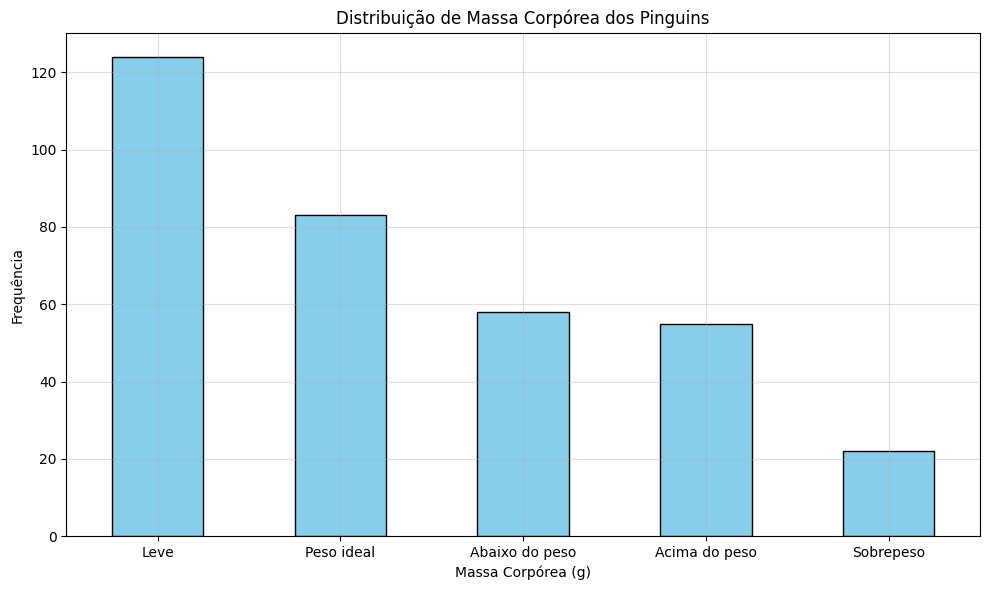

In [ ]:
plt.figure(figsize=(10, 6))
penguins['body_mass_category'].value_counts().plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)
plt.grid(alpha=0.4)
plt.title('Distribuição de Massa Corpórea dos Pinguins')
plt.xlabel('Massa Corpórea (g)')
plt.ylabel('Frequência')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

**❓ Explique a razão pela qual você escolheu essa variável e como a discretização pode afetar a análise.**

🗣️ A variável escolhida representa uma informação (peso) muito comum,  ou seja, o compreendimento da discretização ficaria mais simples.

Quando realizamos discretizações como esta, devemos tomar cuidado para utilizar tal simplificação em modelos de ML, visto o mesmo pode perder precisão utilizando dados tão genéricos.

***

#### 📍 **Exercício 04:** Discretização com Bins Variáveis no Dataset Palmer Penguins
Aplique a técnica de quantização com bins variáveis em uma variável contínua do dataset Palmer Penguins. Compare os resultados com a discretização feita no exercício anterior.

In [ ]:
bins = [1500, 2700, 3500, 4200, 5000, 6300]  # larguras diferentes
labels = ['Abaixo do peso', 'Leve', 'Peso ideal', 'Acima do peso', 'Sobrepeso']

penguins['body_mass_var_bins'] = pd.cut(
    penguins['body_mass_g'],
    bins=bins,
    labels=labels
)

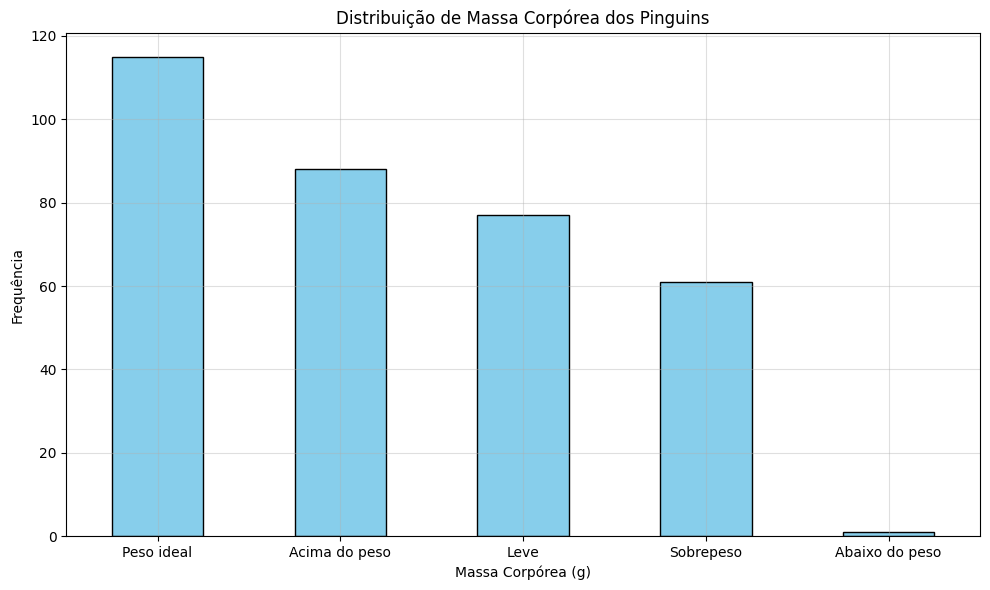

In [ ]:
plt.figure(figsize=(10, 6))
penguins['body_mass_var_bins'].value_counts().plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)
plt.grid(alpha=0.4)
plt.title('Distribuição de Massa Corpórea dos Pinguins')
plt.xlabel('Massa Corpórea (g)')
plt.ylabel('Frequência')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

**❓ Compare os resultados com a discretização feita no exercício anterior.**

🗣️ Ordem das categorias anteriores (decrescente)
1. Leve (pouco acima de 120)
2. Peso ideal (pouco acima de 80)
3. Abaixo do peso (próx. de 60)
4. Acima do peso (próx. de 60, abaixo de Abaixo do peso)
5. Sobrepeso (Pouco acima de 20)

Ordem das categorias com bins variados (decrescente)
1. Peso ideal (Pouco abaixo de 120)
2. Acima do peso (Próx. de 90)
3. Leve (Próx. de 80)
4. Sobrepeso (Pouco acima de 60)
5. Abaixo do peso (Próx. de 0)

Pecebe-se que a ordem e as quantidades mudou completamente!
No primeiro gráfico, tinha-se uma quantidade considerável em cada categoria, com a categoria "Leve" sendo a mais populosa. Já no segundo gráfico, a categoria "Abaixo do peso" está praticamente zerada e a categoria "Leve" passou para a terceira mais populosa, atrás de "Peso ideal" e "Acima do peso", respectivamente.

***

#### 📍 **Exercício 05:** Uso de FunctionTransformer no Dataset Palmer Penguins
Aplique a FunctionTransformer do Scikit-Learn em uma variável do dataset Palmer Penguins. Descreva o processo e explique como essa transformação pode ser benéfica.

In [ ]:
numeric_features = penguins[[
    'bill_length_mm',
    'bill_depth_mm',
    'flipper_length_mm',
    'body_mass_g'
]]

numeric_features

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0


In [ ]:
transformer = FunctionTransformer(np.log1p)
transformer.transform(numeric_features)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,3.691376,2.980619,5.204007,8.229778
1,3.701302,2.912351,5.231109,8.243019
2,3.720862,2.944439,5.278115,8.086718
3,NaN,NaN,NaN,NaN
4,3.629660,3.010621,5.267858,8.146419
...,...,...,...,...
339,4.039536,3.034953,5.337538,8.294300
340,3.795489,2.949688,5.313206,8.131825
341,3.923952,2.954910,5.267858,8.236421
342,3.947390,2.995732,5.351858,8.318986


**❓ Descreva o processo.**

🗣️ O processo divide-se em 3 etapas:
1. Seleção das variáveis que serão transformadas \
Aqui, foram selecionadadas apenas as variáveis numéricas que representam medidas (milímetros e gramas). A partir disso, os dados foram separados em um novo dataframe.

2. Criação do transformer \
Para a transformação que será aplicada nas variáveis, optou-se por utilizar a escala logarítmica (np.log1p).

3. Transformação e comparação dos dados \
Tendo o transformer criado e os dados selecionados, seguiu-se para a transformação de fato. Aqui, foi aplicado a escala logarítmica às varíaveis selecionadas, onde foi possível comparar diferença de antes e depois do log.

<br>

**❓ Explique como essa transformação pode ser benéfica.**

🗣️ No exemplo realizado e descrito acima, a escala logarítmica é benéfica, pois em estudos de ML a presença de outliers nos modelos é um grande problema. Ter eles no treinamento do modelo pode causar aprendizagens errônias.

Quando transforma-se tudo com o log, diminui-se a diferença entre os valores mínimos e máximos. Ou seja, os valores dos outliers não são tão exressívos, o que é melhor para o ML.

***

#### 📍 **Exercício 06:** Aplicação de PowerTransformer no Dataset Palmer Penguins
Utilize a PowerTransformer do Scikit-Learn para transformar uma variável do dataset Palmer Penguins. Discuta os benefícios dessa transformação.

In [ ]:
numeric_features['body_mass_g'] = numeric_features['body_mass_g'].ffill()
numeric_features['body_mass_g'].min()

/tmp/ipython-input-412988031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_features['body_mass_g'] = numeric_features['body_mass_g'].ffill()


2700.0

In [ ]:
box_cox, bc_params = stats.boxcox(numeric_features['body_mass_g'])
numeric_features['body_mass_g_box_cox'] = box_cox
numeric_features[['body_mass_g', 'body_mass_g_box_cox']]

/tmp/ipython-input-4228095246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_features['body_mass_g_box_cox'] = box_cox


,body_mass_g,body_mass_g_box_cox
0,3750.0,2.116576
1,3800.0,2.116871
2,3250.0,2.113270
3,3250.0,2.113270
4,3450.0,2.114676
...,...,...
339,4000.0,2.117996
340,3400.0,2.114336
341,3775.0,2.116724
342,4100.0,2.118529


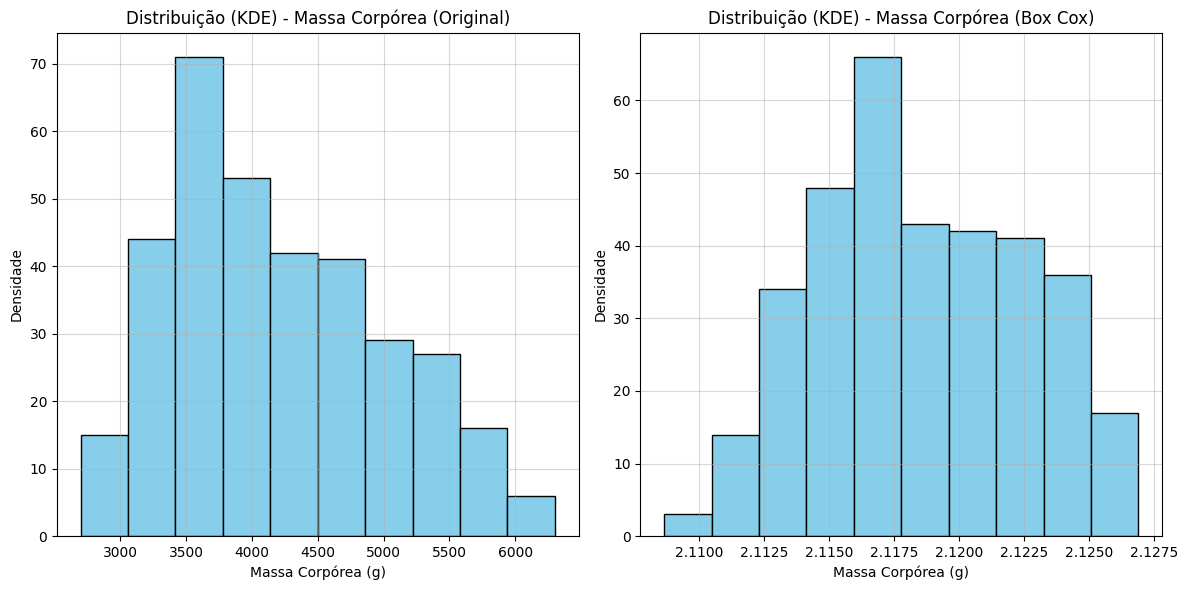

In [ ]:
plt.figure(figsize=(12, 6))

# Original
plt.subplot(1, 2, 1)
numeric_features['body_mass_g'].plot(
    kind='hist',
    color='skyblue',
    edgecolor='black'
)

plt.title('Distribuição (KDE) - Massa Corpórea (Original)')
plt.xlabel('Massa Corpórea (g)')
plt.ylabel('Densidade')
plt.grid(alpha=0.5)

# Box Cox
plt.subplot(1, 2, 2)

numeric_features['body_mass_g_box_cox'].plot(
    kind='hist',
    color='skyblue',
    edgecolor='black'
)

plt.title('Distribuição (KDE) - Massa Corpórea (Box Cox)')
plt.xlabel('Massa Corpórea (g)')
plt.ylabel('Densidade')
plt.grid(alpha=0.5)


plt.tight_layout()
plt.show()

**❓ Discuta os benefícios dessa transformação.**

🗣️ A transformação por meio do método Box-Cox é benéfica porque ajuda a tornar os dados mais próximos de uma distribuição normal, reduzindo assimetria.

Também diminui o impacto de valores extremos, comprimindo diferenças muito grandes entre valores altos e baixos.

***

#### 📍 **Exercício 07:** Normalização Min-Max no Dataset Palmer Penguins
Aplique a normalização Min-Max do Scikit-Learn em uma ou mais variáveis do dataset Palmer Penguins. Explique como essa normalização impacta o modelo de Machine Learning.

In [ ]:
min_max_scaler = MinMaxScaler()
numeric_features['flipper_length_mm_scaler'] = min_max_scaler.fit_transform(numeric_features[['flipper_length_mm']])

numeric_features[['flipper_length_mm', 'flipper_length_mm_scaler']]

/tmp/ipython-input-3177123171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_features['flipper_length_mm_scaler'] = min_max_scaler.fit_transform(numeric_features[['flipper_length_mm']])


,flipper_length_mm,flipper_length_mm_scaler
0,181.0,0.152542
1,186.0,0.237288
2,195.0,0.389831
3,NaN,NaN
4,193.0,0.355932
...,...,...
339,207.0,0.593220
340,202.0,0.508475
341,193.0,0.355932
342,210.0,0.644068


**❓ Explique como essa normalização impacta o modelo de Machine Learning.**

🗣️ Aplicar o Min Max Scaler pode impactar o modelo, pois este método utiliza o valor mínimo e o máximo para calcular a diferença e normalizar os demais valores, escalando todos os demais valores para um intervalo entre 0 e 1. A presença de outliers pode comprometer a normalização.

***

#### 📍 **Exercício 08:** Normalização com Standard Scaler no Dataset Palmer Penguins
Utilize o StandardScaler do Scikit-Learn para normalizar variáveis do dataset Palmer Penguins. Discuta a diferença entre esta técnica e a normalização Min-Max.

In [ ]:
scaler = StandardScaler()
numeric_features['bill_depth_mm_scaler'] = scaler.fit_transform(numeric_features[['bill_depth_mm']])

numeric_features[['bill_depth_mm', 'bill_depth_mm_scaler']]

/tmp/ipython-input-4288946950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_features['bill_depth_mm_scaler'] = scaler.fit_transform(numeric_features[['bill_depth_mm']])


,bill_depth_mm,bill_depth_mm_scaler
0,18.7,0.785449
1,17.4,0.126188
2,18.0,0.430462
3,NaN,NaN
4,19.3,1.089724
...,...,...
339,19.8,1.343286
340,18.1,0.481175
341,18.2,0.531887
342,19.0,0.937586


**❓ Discuta a diferença entre esta técnica e a normalização Min-Max.**

🗣️ Quando utiliza-se o MinMax Scaler, reescala-se os dados para um intervalo entre 0 e 1, comprimindo ou expandindo a escala, mantendo a forma da distribuição.

O Standard Scaler padroniza os dados com base na média e desvio padrão, centralizando os dados na média 0 e ajustando o desvio padrão para 1. Pode gerar valores negativos.

***

#### 📍 **Exercício 09:** Regularização Norma-L2 no Dataset Palmer Penguins
Implemente um modelo de regressão linear com regularização norma-L2 utilizando o dataset Palmer Penguins.

In [ ]:
# Remoção de coluna duplicada
penguins = penguins.drop(columns=['body_mass_var_bins'])

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_category
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,Leve
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,Leve
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,Abaixo do peso
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,Leve


In [ ]:
penguins = penguins.ffill() # Preenchendo os valores NaN com os valores anteriores

In [ ]:
numeric_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_features = ['species', 'island', 'sex', 'body_mass_category']

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(penguins[categorical_features]) # Transformando categorias em números

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_features), index=penguins.index) # Criação do DF com os valores categóricos transformados

In [ ]:
X = pd.concat([penguins[numeric_features], encoded_df], axis=1) # Agrupa os DFs (variáveis numéricas e categóricas transformadas)
X = X.drop(columns=['species_Adelie', 'species_Chinstrap', 'species_Gentoo']) # Remove as colunas de espécies
y = penguins['species']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
normalizer = Normalizer(norm='l2')

X_train[numeric_features] = normalizer.fit_transform(X_train[numeric_features]) # Cálculo dos parâmetros
X_test[numeric_features] = normalizer.transform(X_test[numeric_features]) # Transformação dos dados

In [ ]:
model = LogisticRegression(penalty='l2', max_iter=1000)
model.fit(X_train, y_train) # Aprende com os dados de treino

accuracy = model.score(X_test, y_test) # Mede os acertos no conjunto de teste
print(f'Precisão do modelo: {accuracy:.2f}')

Precisão do modelo: 0.80


In [ ]:
y_pred = model.predict(X_test)


df_comparacao = pd.DataFrame({
    'Real': y_test,
    'Previsto': y_pred,
    'Correto': y_test == y_pred
})

df_comparacao.head(10)

,Real,Previsto,Correto
151,Adelie,Chinstrap,False
1,Adelie,Adelie,True
226,Gentoo,Gentoo,True
269,Gentoo,Gentoo,True
282,Chinstrap,Adelie,False
102,Adelie,Adelie,True
303,Chinstrap,Chinstrap,True
237,Gentoo,Gentoo,True
304,Chinstrap,Chinstrap,True
297,Chinstrap,Adelie,False


🗣️ Foi utilizado um modelo de regressão logística para tentar prever as categorias dos pinguins. A utilização de regressão linear aplica-se somente à previsão de valores numéricos.

***

#### 📍 **Exercício 10:** Aplicação Complexa de FunctionTransformer com Múltiplas Transformações
Utilize a FunctionTransformer do Scikit-Learn para aplicar múltiplas transformações em sequência a uma variável do dataset Palmer Penguins. Por exemplo, aplique uma transformação logarítmica seguida por uma transformação exponencial inversa.

**Dicas:**

* Utilize `FunctionTransformer` para definir e aplicar cada transformação individualmente;
* Analise a distribuição da variável antes e depois das transformações utilizando histogramas e estatísticas descritivas.

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_category
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,Leve
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,Leve
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,Abaixo do peso
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,Abaixo do peso
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,Leve


In [ ]:
# Definição das funções
def log_and_scale(x):
    x = np.log1p(x)
    x = StandardScaler().fit_transform(x.reshape(-1, 1)) # Utilizamos o reshape(-1, 1), pois o StandardScaler espera um valor 2D (bi-dimensional)
    return x

# Aplicação de múltiplas transformações com FunctionTransformer
transformer = FunctionTransformer(log_and_scale)

penguins['body_mass_g_transformed'] = transformer.transform(
    penguins['body_mass_g'].values
)

In [ ]:
penguins[['body_mass_g', 'body_mass_g_transformed']].head()

,body_mass_g,body_mass_g_transformed
0,3750.0,-0.509973
1,3800.0,-0.439472
2,3250.0,-1.271654
3,3250.0,-1.271654
4,3450.0,-0.953791


**❓ Explique os passos realizados.**

🗣️ Na transformação acima, utilizando o `FunctionTransformer`, a variável *body_mass_g* foi transformada por meio da aplicação de `np.log1p()` e `StandardScaler()`. Primeiro aplicou-se uma transformação logarítmica para reduzir a assimetria, e em seguida os dados foram padronizados para média 0 e desvio padrão 1.


<br>

**❓ Analise como essas transformações impactam a distribuição da variável transformada.**

🗣️ A transformação logarítmica reduz a assimetria comprimindo os valores elevados e diminuindo o impacto de possíveis outliers. Em seguida, o StandardScaler padroniza a variável, centralizando-a na média 0 e ajustando o desvio padrão para 1.

***

#### 📍 **Exercício 11:** Comparação de Transformações com PowerTransformer
Aplique a PowerTransformer do Scikit-Learn a uma variável do dataset Palmer Penguins. Em seguida, aplique uma transformação alternativa, como a normalização z-score (StandardScaler). Compare as distribuições resultantes das variáveis transformadas usando gráficos e estatísticas descritivas. Discuta as diferenças observadas e as situações em que cada técnica pode ser mais apropriada.

**Dicas:**

* Utilize `PowerTransformer` e `StandardScaler` para aplicar as transformações;
* Compare os resultados utilizando histogramas, box plots e estatísticas como média e desvio padrão.

In [ ]:
df_comparacao = penguins[['body_mass_g']].copy()

In [ ]:
# Box-Cox
pt = PowerTransformer(method='box-cox')
df_comparacao['body_mass_g_box_cox'] = pt.fit_transform(
    df_comparacao[['body_mass_g']]
)

# StandardScaler
df_comparacao['body_mass_g_scaler'] = StandardScaler().fit_transform(df_comparacao[['body_mass_g']])

df_comparacao.head()

,body_mass_g,body_mass_g_box_cox,body_mass_g_scaler
0,3750.0,-0.479921,-0.563126
1,3800.0,-0.406184,-0.500708
2,3250.0,-1.306009,-1.187309
3,3250.0,-1.306009,-1.187309
4,3450.0,-0.954613,-0.937636


/tmp/ipython-input-2212562233.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(
/tmp/ipython-input-2212562233.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


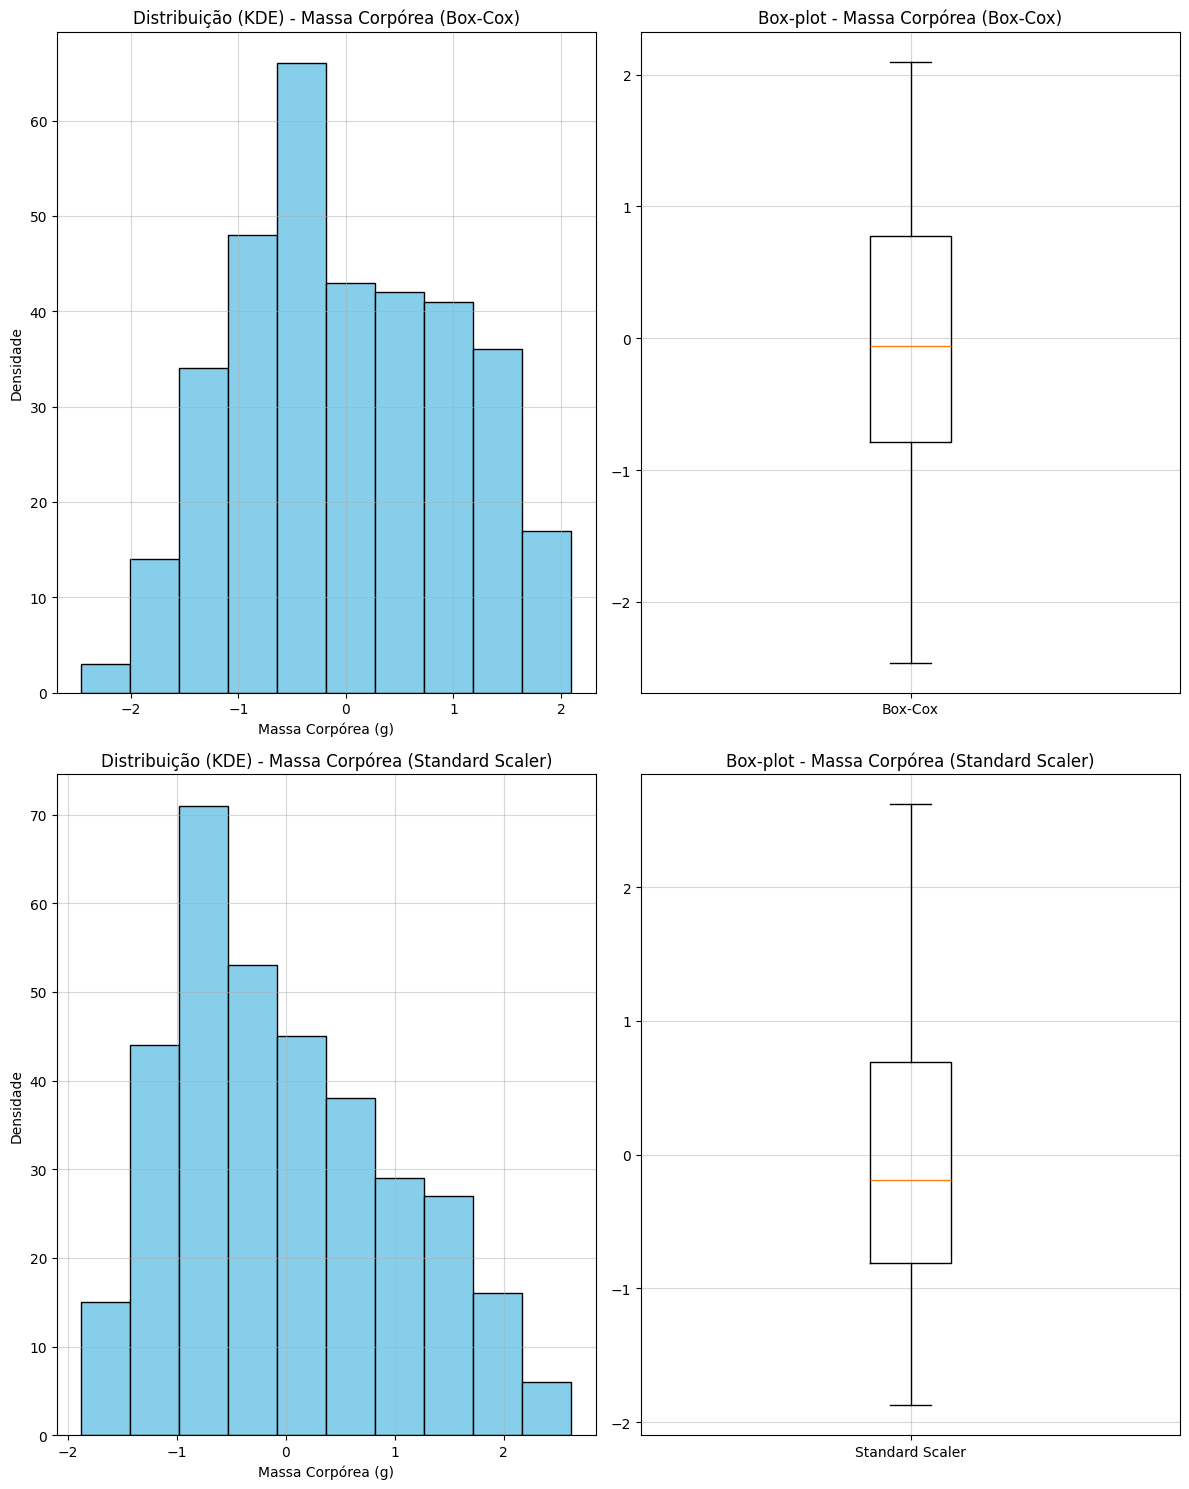

In [ ]:
plt.figure(figsize=(12, 15))

# Box-Cox - Histograma
plt.subplot(2, 2, 1)
df_comparacao['body_mass_g_box_cox'].plot(
    kind='hist',
    color='skyblue',
    edgecolor='black'
)

plt.title('Distribuição (KDE) - Massa Corpórea (Box-Cox)')
plt.xlabel('Massa Corpórea (g)')
plt.ylabel('Densidade')
plt.grid(alpha=0.5)

# Box-Cox - Box-plot
plt.subplot(2, 2, 2)
plt.boxplot(
    df_comparacao['body_mass_g_box_cox'],
    labels=['Box-Cox'],
)

plt.title('Box-plot - Massa Corpórea (Box-Cox)')
plt.grid(alpha=0.5)

# -------------------------------------------

# Standard Scaler - Histograma
plt.subplot(2, 2, 3)

df_comparacao['body_mass_g_scaler'].plot(
    kind='hist',
    color='skyblue',
    edgecolor='black'
)

plt.title('Distribuição (KDE) - Massa Corpórea (Standard Scaler)')
plt.xlabel('Massa Corpórea (g)')
plt.ylabel('Densidade')
plt.grid(alpha=0.5)

# Standard Scaler - Box-plot
plt.subplot(2, 2, 4)
plt.boxplot(
    df_comparacao['body_mass_g_scaler'],
    labels=['Standard Scaler'],
)

plt.title('Box-plot - Massa Corpórea (Standard Scaler)')
plt.grid(alpha=0.5)


plt.tight_layout()
plt.show()

**❓ Discuta as diferenças observadas e as situações em que cada técnica pode ser mais apropriada.**

🗣️ Utilizando o `StandardScaler` nada muda em relação a distribuição. O formato assimétrico mentem-se, mudando apenas a escala dos valores.
Agora, com o `PowerTransformer(method='box-cox')`, a cauda à direita diminiu, ou seja, reduziu-se, levemente, a assimetria. Com isso, os outliers tem seus impactos reduzidos, melhor na normalização.

***

#### 📍 **Exercício 12:** Normalização Min-Max Individualmente
Aplique a normalização Min-Max do Scikit-Learn a uma variável contínua do dataset Palmer Penguins. Visualize os dados normalizados e compare com os dados originais. Explique como a normalização Min-Max influencia a visualização dos dados e a comparação entre diferentes variáveis.

**Dicas:**

* Utilize `MinMaxScaler` para normalizar a variável selecionada;
* Visualize os dados antes e depois da normalização utilizando gráficos como pair plots ou heatmaps.

In [ ]:
penguins['body_mass_g_min_max_scaler'] = MinMaxScaler().fit_transform(penguins[['body_mass_g']])

penguins[['body_mass_g', 'body_mass_g_min_max_scaler']]

,body_mass_g,body_mass_g_min_max_scaler
0,3750.0,0.291667
1,3800.0,0.305556
2,3250.0,0.152778
3,3250.0,0.152778
4,3450.0,0.208333
...,...,...
339,4000.0,0.361111
340,3400.0,0.194444
341,3775.0,0.298611
342,4100.0,0.388889


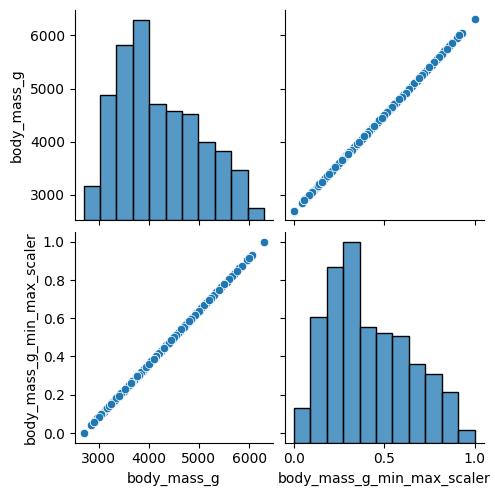

In [ ]:
sns.pairplot(
    penguins[['body_mass_g', 'body_mass_g_min_max_scaler']]
)

plt.show()

**❓ Explique como a normalização Min-Max influencia a visualização dos dados e a comparação entre diferentes variáveis.**

🗣️ A normalização Min-Max reescala os dados para um intervalo fixo (0 e 1). Isso facilita a comparação entre variáveis com escalas diferentes e melhora a visualização em análises multivariadas. No entanto, como é uma transformação linear, não reduz a assimetria nem corrige a presença de outliers.